#### zipf's law: 一个单词出现的频率与它在频率表里的排名成反比

In [1]:
import re
import string
def data_helper(s):
    '''
    # 去除字符串中的数字，字母和中文标点
    '''
    # 去除中文标点
    cn_punctuation = '！？。＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.'
    s = re.sub(r'[0-9a-zA-Z'+cn_punctuation+']', '', s)
    # 去除英文标点
    s = re.sub(r'[' + string.punctuation + ']', '', s)
    return s

# s = '你好，9527.欢迎,.!""？‘。。。。'
# data_helper(s)

In [ ]:
import jieba
from tqdm import tqdm
def read_corpus(filename='../data/修真四万年.txt'):
    '''
    contexts: list of list of words(string)
    '''

    word2count = {}
    with open(filename) as f:
        try:
            with tqdm(f.readlines()) as t:
                for segment in t:
                    # 去除空行
                    if len(segment) == 1:
                        continue
                    # 切分句子，并删除句号
                    sentences = [sentence for sentence in segment.split('。')]
                    for sentence in sentences:
                        # 句子中的特殊符号处理
                        sentence = data_helper(sentence)
                        # 去除空白符
                        sentence.strip('\s\n')
                        
                        # 统计词语出现次数
                        words = jieba.lcut(sentence)
                        for word in words:
                            count = word2count.get(word, 0)
                            word2count[word] = count + 1
        except KeyboardInterrupt:
            t.close()
            raise

        t.close()

    return word2count

word2count = read_corpus()

In [3]:
word2count = [(key, value) for key, value in word2count.items()]
word2count = sorted(word2count, key= lambda x:x[1], reverse=True)

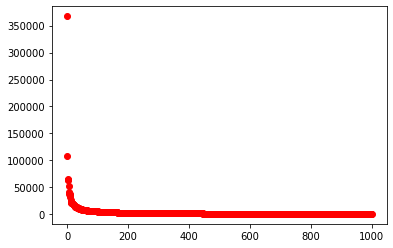

In [5]:
import matplotlib.pyplot as plt

top = 1000
labels, y = zip(*word2count[:top])
fig, ax = plt.subplots()
x = range(top)
ax.scatter(x,y,c='r')

# 给个点加个标记
if False:
    for idx, label in enumerate(labels):
        ax.annotate(idx, (x[idx], y[idx]))